<a href="https://colab.research.google.com/github/cristianmunoz1/Intro_ML_project/blob/main/Clasificaci%C3%B3n/08_Logistic_Regression_SVM_Data_sfs_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Re-entrenamiento de Regresión logística con los datos de Selección de características.

Realizamos los importes necesarios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import (
  precision_score, recall_score,
  roc_auc_score, accuracy_score,
  confusion_matrix, ConfusionMatrixDisplay,
  roc_curve
)

Cargamos los datos en un df de pandas

In [ ]:
data = pd.read_csv('data_sfs.csv')

Escalamos la variable a predecir y partimos los datos en subconjuntos de train y test

In [ ]:
X = data.drop(columns=['AdoptionLikelihood'])
y = data['AdoptionLikelihood']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Regresión logística

Entrenamos un modelo de regresión logística con los datos y calculamos el ROC AUC, la precisión y el recall

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)
y_test_proba = log_reg.predict_proba(X_test)[:, 1]

Calculamos las métricas con el conjunto de prueba

In [ ]:
# === Métricas ===
print("\n=== Métricas en el conjunto de prueba ===")
print(f"Accuracy:  {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Precisión: {precision_score(y_test, y_test_pred):.3f}")
print(f"Recall:    {recall_score(y_test, y_test_pred):.3f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_test_proba):.3f}")


=== Métricas en el conjunto de prueba ===
Accuracy:  0.749
Precisión: 0.626
Recall:    0.583
ROC AUC:   0.799


Graficamos la matriz de confusión

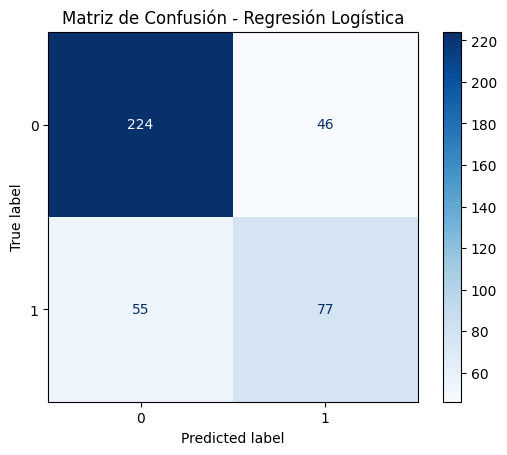

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

Graficamos la curva ROC

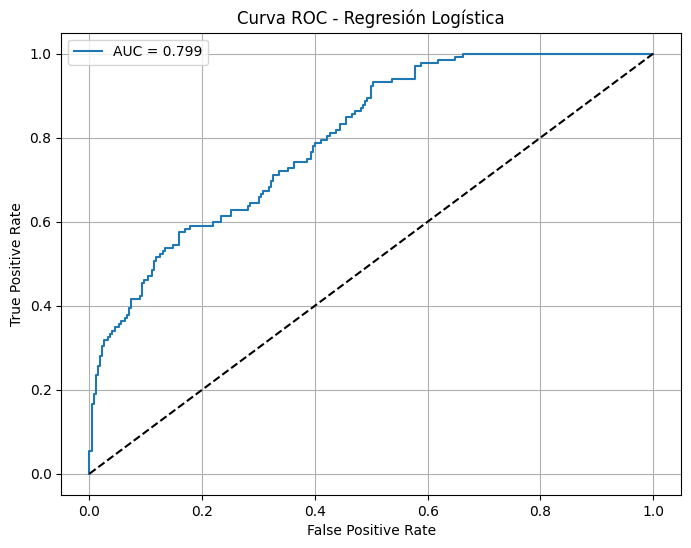

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
auc = roc_auc_score(y_test, y_test_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid()
plt.show()

# Entrenamiento de SVM con datos de SFS usando la información mutua

In [ ]:
svc = svm.SVC(C=10, class_weight=None, degree=2, gamma='scale', kernel='linear', probability=True)
svc.fit(X_train, y_train)

SVC(C=10, degree=2, kernel='linear', probability=True)

Realizamos predicciones y calculamos las métricas

In [ ]:
y_test_pred = svc.predict(X_test)
y_proba = svc.predict_proba(X_test)[:, 1]

In [ ]:
print("\n=== Métricas en el conjunto de prueba ===")
print(f"Precisión: {precision_score(y_test, y_test_pred):.3f}")
print(f"Recall:    {recall_score(y_test, y_test_pred):.3f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.3f}")


=== Métricas en el conjunto de prueba ===
Precisión: 0.673
Recall:    0.576
ROC AUC:   0.802


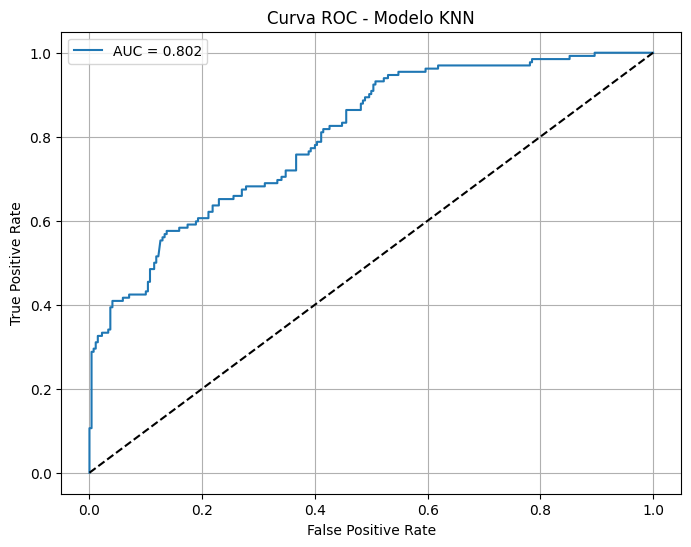

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Modelo KNN')
plt.legend()
plt.grid()
plt.show()